In [2]:
import unicodecsv
import pandas as pd
#read data from CSV file and make it to lists
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
    
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn



In [3]:
data = pd.read_csv('../model/ex2data1.txt')
data

,34.62365962451697,78.0246928153624,0
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0
5,61.106665,96.511426,1
6,75.024746,46.554014,1
7,76.098787,87.420570,1
8,84.432820,43.533393,1
9,95.861555,38.225278,0


# check null

In [3]:
data_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
x1    100 non-null float64
x2    100 non-null float64
y     100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [4]:
data_im.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

# check binary

In [5]:
isBinary=[x==0 or x==1 for x in data_im['y']]
isBinary=False in isBinary
isBinary

False

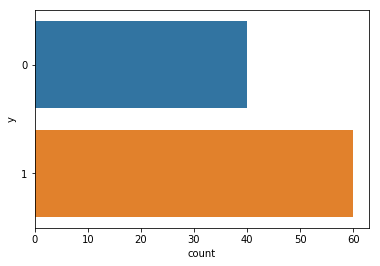

In [6]:
import seaborn as sns
sns.countplot(y="y", data=data_im)
plt.show()

In [7]:
import numpy as np

x1 =data_im['x1']
x2 =data_im['x2']
y = data_im['y']



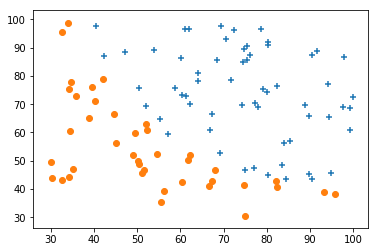

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

plt.scatter(x1[y==1], x2[y==1], marker='+')
plt.scatter(x1[y==0], x2[y==0], marker='o')

plt.show()
    

    

In [9]:
import numpy as np
import statsmodels.api as sm
X = data_im.iloc[:,0:2]
y=data_im['y']

X_con =sm.add_constant(X)
results=sm.OLS(y,X_con).fit()
results.params

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


const   -1.297497
x1       0.014841
x2       0.013942
dtype: float64

In [10]:
import numpy as np

X = data_im.iloc[:,0:2]
y=data_im['y']
one = np.ones((len(X), 1))
mat_one = np.c_[one,X]
theta= np.array([1,1,1])
x = mat_one.dot(theta) #array


# sigmoid

In [11]:
import math
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [12]:
def cost(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))


In [15]:
X = pd.DataFrame(mat_one)
y=pd.DataFrame(y)



X = np.array(X.values)  
y = np.array(y.values)  
theta = np.array([0,0,0])

In [16]:
theta.shape


(3,)

In [17]:
 cost(theta, X, y)

0.69314718055994529

In [18]:
X.shape, theta.shape, y.shape 

((100, 3), (3,), (100, 1))

In [19]:
cost(theta, X, y) 

0.69314718055994529

In [25]:
def gradient(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(mat_one)
    y=np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad




In [26]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [27]:
import scipy.optimize as opt  
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y)) 
cost(result[0], X, y)


0.20349770158947425

In [28]:
theta.shape,X.shape,y.shape

((3,), (100, 3), (100, 1))

In [29]:
result[0]

array([-25.16131872,   0.20623159,   0.20147149])

In [30]:
iterations = 2000
alpha = 0.001


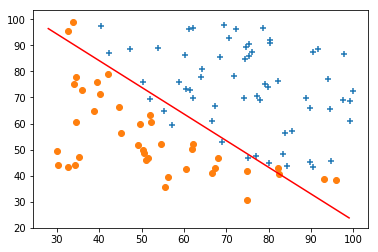

In [31]:
x1 =data_im['x1']
x2 =data_im['x2']
y = data_im['y']
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

x_test = np.array(list(range(28,100))).astype(float)
plt.scatter(x1[y==1], x2[y==1], marker='+')
plt.scatter(x1[y==0], x2[y==0], marker='o')
plt.plot(x_test, (-0.206*x_test +25.161)/0.201, 'r')


# sklearn

In [22]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
X = data_im.iloc[:,0:2]
y = data_im['y']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.30,random_state=0)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70, 2), (30, 2), (70,), (30,))

In [25]:
classes = LogisticRegression(random_state=0)
classes.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
y_pred = classes.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)



[[ 8  3]
 [ 0 19]]


In [27]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classes.score(X_test, y_test)))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(classes.score(X_train, y_train)))

Accuracy of logistic regression classifier on test set: 0.90
Accuracy of logistic regression classifier on train set: 0.81


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.73      0.84        11
          1       0.86      1.00      0.93        19

avg / total       0.91      0.90      0.90        30

